### Logistic Regression 

In [1]:
import numpy as np 

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

plt.style.use("seaborn")

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1] , [.1 , 1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1] , [.1 , 1.3]])

dist_01 = np.random.multivariate_normal(mean_01 , cov_01 , 500)
dist_02 = np.random.multivariate_normal(mean_02 , cov_02 , 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


##  Data Viualisation 

In [4]:
data = np.zeros((1000 , 3))
print(data.shape)
data[: 500,:2] = dist_01
data[500  : , :2] = dist_02
data[500 : , -1] = 1.0

(1000, 3)


In [5]:
np.random.shuffle(data)
print(data[: 10])

[[ 2.8639995   5.69251885  1.        ]
 [ 2.77275245  5.94150303  1.        ]
 [ 5.29864315  6.10819823  1.        ]
 [ 4.65019392  5.34346176  1.        ]
 [ 5.03682632  3.46291235  1.        ]
 [ 1.16637683  0.76279114  0.        ]
 [ 6.35481559  6.16807638  1.        ]
 [ 3.22925267  4.6112873   1.        ]
 [-0.23944524  2.4770623   0.        ]
 [ 1.23318405 -0.0221622   0.        ]]


In [6]:
split = int(0.8*data.shape[0])


In [7]:
X_train = data[:split , : -1]
X_test = data[split : , : -1]
Y_train = data[: split , -1]
Y_test = data[split: ,-1]

In [8]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


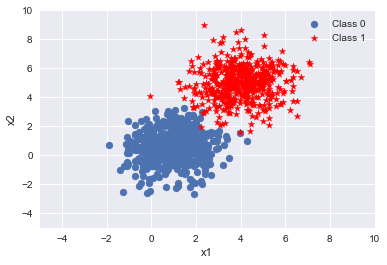

In [9]:
plt.scatter(dist_01[: , 0] ,dist_01[: , 1] , label= "Class 0" ) 
plt.scatter(dist_02[: , 0] ,dist_02[: , 1] ,color =  "r" , marker="*" ,label= "Class 1" ) 
plt.xlim(-5 , 10)
plt.ylim(-5 , 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [10]:
def hypothesis(x,w,b):
    # accpt input vector x , input weight vector w and bias b 
    h = np.dot(x , w)  + b
    return sigmoid(h)
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-1.0*z))


def error(y_true , x ,w, b):
    
    m = x.shape[0]
    err = 0.0
    for i  in range(m):
        hx = hypothesis(x[i] , w ,b)
        err += y_true[i]*np.log2(hx)  + (1 - y_true[i])*np.log2(1-hx)
        
    return -err/m

def get_grads(y_true , x ,w ,b):
    grad_w = np.zeros(w.shape)
    grad_b  = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i] , w ,b)
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i] - hx)
    grad_w /=m
    grad_b  /=m
    return [grad_w , grad_b]



def grad_desent(x , y_true , w , b ,lr = 0.1):
    err = error(y_true , x ,w ,b)
    [grad_w , grad_b] = get_grads(y_true , x, w ,b)
    
    w = w + lr * grad_w
    b = b + lr* grad_b
    return err , w ,b


def predict(x , w, b):
    confidence = hypothesis(x , w ,b)
    if confidence < 0.5:
        return 0
    else:
        return 1

def get_acc(xtest , ytest , w ,b):
        
        y_pred = []
        
        for i in range(ytest.shape[0]):
            p = predict(xtest[i] , w ,b)
            y_pred.append(p)
        
        y_pred = np.array(y_pred)
        return ((y_pred==Y_test).sum()) / ytest.shape[0]
    



In [31]:
loss = [] 
acc = []
W = 2*np.random.random((X_train.shape[1] , ))
b = 5*np.random.random()
print(W , b)
for i in range(1000):
    l , W, b = grad_desent(X_train , Y_train  ,W , b ,lr = 0.5)
    acc.append(get_acc(X_test , Y_test , W , b))
    loss.append(l)

[0.90782648 1.42015905] 4.798122277862777


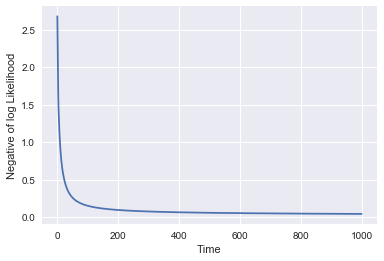

In [12]:
plt.plot(loss)
plt.ylabel("Negative of log Likelihood")
plt.xlabel("Time")

plt.show()

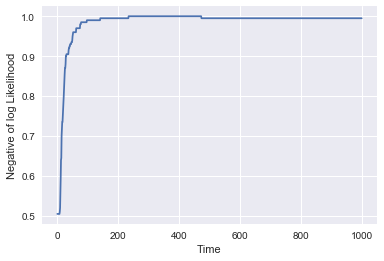

In [13]:
plt.plot(acc)
plt.ylabel("Negative of log Likelihood")
plt.xlabel("Time")

plt.show()

In [14]:
print(acc[-1])

0.995


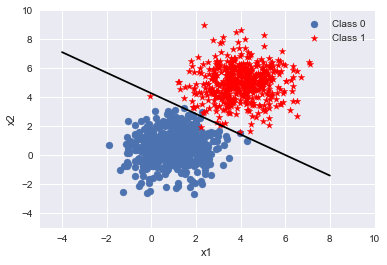

In [15]:
plt.scatter(dist_01[: , 0] ,dist_01[: , 1] , label= "Class 0" ) 
plt.scatter(dist_02[: , 0] ,dist_02[: , 1] ,color =  "r" , marker="*" ,label= "Class 1" ) 

x = np.linspace(-4 , 8 ,10)
y = -(W[0]*x + b  ) / W[1]
plt.plot(x , y ,color =  "black")

plt.xlim(-5 , 10)
plt.ylim(-5 , 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [63]:
print(W)
print(b)

[-3.4013996   2.64486327 -2.45338358]
-3.490362819302716


In [67]:
dfx = pd.read_csv("../logisticRegression/TrainingData/Logistic_X_Train.csv")
dfy = pd.read_csv("../logisticRegression/TrainingData/Logistic_Y_Train.csv")

In [68]:
X = dfx.values
Y = dfy.values.reshape((-1, ))

In [69]:
print(X.shape,Y.shape)
X = (X - X.mean() ) / X.std() 

(3000, 3) (3000,)


In [70]:
print(X,Y)

[[-1.23608005  0.31486715 -0.6816324 ]
 [-1.0775092   0.35568662 -1.27066137]
 [-0.74953968  0.96256718 -1.35506599]
 ...
 [-0.20055496  1.00879471 -1.98037664]
 [ 0.92016383  0.40076717  0.90468374]
 [-1.0336338   0.17045789 -1.47008557]] [1 1 1 ... 1 0 1]


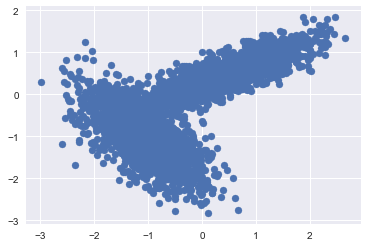

In [71]:
plt.scatter(X[:,0] ,X[:,2] , label= "Class 0" ) 
plt.show()
#plt.scatter(dist_02[: , 0] ,dist_02[: , 1] ,color =  "r" , marker="*" ,label= "Class 1" ) 

In [72]:
dftest = pd.read_csv("../logisticRegression/TestCases/Logistic_X_Test.csv")

In [73]:
Xtest = dftest.values

In [74]:
loss = [] 
acc = []
W = 2*np.random.random((X.shape[1] , ))
b = 5*np.random.random()
print(W.shape)

(3,)


In [75]:
for i in range(1000):    
    l , W, b = grad_desent(X , Y  ,W , b ,lr = 0.5)
    loss.append(l)

In [76]:
print(W)

[-4.01893769  3.11651736 -2.97480062]


In [77]:
print(b)

-4.200001130759829


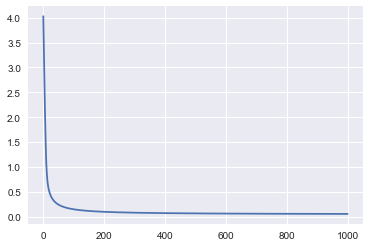

In [78]:
plt.plot(loss)
plt.show()

In [79]:
y = []
for i in range(Xtest.shape[0]):
    y_ = predict(Xtest[i] , W , b)
    y.append(y_)
    

In [80]:
y = np.array(y)

In [81]:
print(y.shape)

(1000,)


In [82]:
df = pd.DataFrame(data=y  , columns=[ "label"])
df.to_csv("chemical.csv", index = False)
df.head()

,label
0,1
1,1
2,0
3,1
4,1
